In [105]:
# Makes the display take up more of the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [106]:
import pandas as pd #python's version of excel
import numpy as np #array library

import datetime as dt # for date sorting

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
from scipy import stats

%matplotlib inline

In [107]:
def rbeta(n,shape1,shape2):
    """
    Calculates the cumulative of the Beta-distribution
    """
    from scipy.stats import beta
    result=beta.rvs(size=n,a=shape1,b=shape2,loc=0,scale=1)
    return result

In [108]:
# DATA
n1 = 132 # Total test
y1 = 2  # Fails test
n2 = 260 # Total expected
y2 = 10  # Fails expected

In [109]:
# SIMULATION
I = 10000 # simulations
theta1 = rbeta(I, y1+1, (n1-y1)+1)  
theta2 = rbeta(I, y2+1, (n2-y2)+1)
diff = theta1-theta2  # simulated diffs

In [110]:
# make intersection
kde1 = gaussian_kde(theta1, bw_method=0.3)
kde2 = gaussian_kde(theta2, bw_method=0.3)

xmin = min(theta1.min(), theta2.min())
xmax = max(theta1.max(), theta2.max())

dx = 0.2 * (xmax - xmin) # add a 20% margin, as the kde is wider than the data
xmin -= dx
xmax += dx

x = np.linspace(xmin, xmax, 500)
kde1_x = kde1(x)
kde2_x = kde2(x)

inters_x = np.minimum(kde1_x, kde2_x)

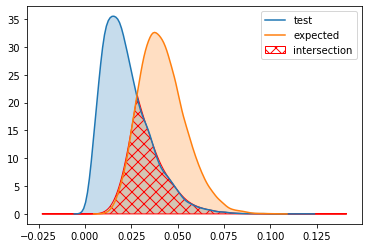

In [118]:
sns.kdeplot(theta1, shade=True, label='test')
sns.kdeplot(theta2, shade=True, label='expected')
plt.fill_between(x, inters_x, 0, facecolor='none', edgecolor='r', hatch='xx', label='intersection')
plt.legend()

plt.show()

In [112]:
# OUTPUT
quant_vals=np.array([0.005,0.025,0.5,0.975,0.995])
quant_rslt= np.quantile(diff,quant_vals)
print(f'{quant_vals[0]*100}%\t{quant_vals[1]*100}%\t{quant_vals[2]*100}%\t{quant_vals[3]*100}%\t{quant_vals[4]*100}%')
print(f'{round(quant_rslt[0],3)}\t{round(quant_rslt[1],3)}\t{round(quant_rslt[2],3)}\t{round(quant_rslt[3],3)}\t{round(quant_rslt[4],3)}')

0.5%	2.5%	50.0%	97.5%	99.5%
-0.065	-0.053	-0.02	0.018	0.033


In [113]:
print("Probability higher % rate1 than expected Rate2;")
print(f'{np.mean(theta1>theta2)*100}%')

Probability higher % rate1 than expected Rate2;
13.309999999999999%


In [114]:
print("Mean difference theta1-theta2")
print(f'{round(np.mean(theta1)- np.mean(theta2),3)}')

Mean difference theta1-theta2
-0.019


In [84]:
def getY_Max(p):    
    #hght_bar=max([h.get_height() for h in p.patches])
    _,kde_y=p.get_lines()[0].get_data()
    hght_kde=max(kde_y)
    
    return hght_kde

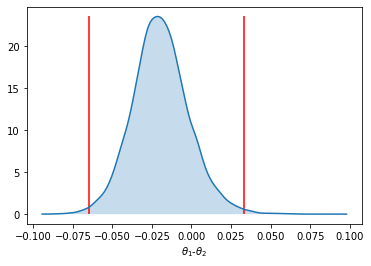

In [119]:
g=sns.kdeplot((theta1-theta2), shade=True)
plt.vlines(x=quant_rslt[0],ymin=0,ymax=getY_Max(g), color='red')
plt.vlines(x=quant_rslt[-1],ymin=0,ymax=getY_Max(g), color='red')

plt.xlabel(r'$\theta_1$-$\theta_2$')

plt.show()

In [120]:
from scipy.stats import chisquare

In [121]:
exp_rate=y2/(n2)
chisquare([(n1-y1),y1],[n1*(1-exp_rate),(n1*exp_rate)])

Power_divergenceResult(statistic=1.9393939393939401, pvalue=0.1637343543245881)

In [122]:
end=dt.datetime.now()
print(f'Finished: {end.strftime("%A %B %d, %Y")} at {end.strftime("%H:%M")}')

Finished: Wednesday June 30, 2021 at 09:16
